In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# This function should be in an other module

def saccades_dir(saccades):
    """
    Classifies saccades into directional categories based on their start and end coordinates.

    This function processes a DataFrame containing saccade data, filling missing values,
    converting coordinate columns to float, computing saccade amplitudes in the x and y
    directions, mapping these to the complex plane, calculating the saccade angles in degrees,
    and finally classifying the direction of each saccade as 'right', 'left', 'up', or 'down'.

    Parameters:
    saccades (pd.DataFrame): DataFrame containing saccade data with the following columns:
                             'xStart', 'xEnd', 'yStart', 'yEnd'.

    Returns:
    pd.DataFrame: The original DataFrame with additional columns:
                  - 'deg': The angle of each saccade in degrees.
                  - 'dir': The direction of each saccade ('right', 'left', 'up', 'down').
    """

    # Fill '.' values with 0
    # This should't be happening. There must be an error in parsing the edf because no saccade should have missing data in the start or end coordinates
    saccades[['xStart', 'xEnd', 'yStart', 'yEnd']] = saccades[['xStart', 'xEnd', 'yStart', 'yEnd']].replace('.', 0)

    # Convert start and end columns to float
    saccades[['xStart', 'xEnd', 'yStart', 'yEnd']] = saccades[['xStart', 'xEnd', 'yStart', 'yEnd']].astype(float)

    # Saccades amplitude in x and y
    x_dif = saccades['xEnd'] - saccades['xStart']
    y_dif = saccades['yEnd'] - saccades['yStart']
    
    # Take to complex plane
    z = x_dif + 1j * y_dif

    # Saccades degrees
    saccades['deg'] = np.angle(z, deg=True)

    # Classify in right / left / up / down
    saccades['dir'] = [''] * len(saccades)

    saccades.loc[(-15 < saccades['deg']) & (saccades['deg'] < 15), 'dir'] = 'right'
    saccades.loc[(75 < saccades['deg']) & (saccades['deg'] < 105), 'dir'] = 'down'
    saccades.loc[(165 < saccades['deg']) | (saccades['deg'] < -165), 'dir'] = 'left'
    saccades.loc[(-105 < saccades['deg']) & (saccades['deg'] < -75), 'dir'] = 'up'


    return saccades

In [17]:

def fixation_duration(fixations, ax=None):

    print('Plotting fixation duration histogram')

    # Use provided axes (or not)
    if ax is None:
        fig, ax = plt.subplots()

    ax.hist(fixations['duration'], bins=100, edgecolor='black', linewidth=1.2, density=True, stacked=True)
    ax.set_title('Fixation duration')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Density')



def saccades_amplitude(saccades, ax=None):

    print('Plotting saccades amplitude histogram')

    # Use provided axes (or not)
    if ax is None:
        fig, ax = plt.subplots()

    saccades_amp = saccades['ampDeg']

    ax.hist(saccades_amp, bins=100, range=(0, 20), edgecolor='black', linewidth=1.2, density=True, stacked=True)
    ax.set_title('Saccades amplitude')
    ax.set_xlabel('Amplitude (deg)')
    ax.set_ylabel('Density')



def saccades_dir_hist(saccades, fig=None, ax=None):

    print('Plotting saccades direction histogram')

    # Use provided axes (or not)
    if ax is None:
        fig = plt.figure()
        ax = plt.subplot(polar=True)
    else:
        ax.set_axis_off()
        ax = fig.add_subplot(2, 2, 3, projection='polar')


    # Add degrees and direction columns to saccades df
    saccades = saccades_dir(saccades=saccades)

    # Convert from deg to rad
    saccades_rad = saccades['deg'] * np.pi / 180 

    n_bins = 24
    ang_hist, bin_edges = np.histogram(saccades_rad, bins=24, density=True)
    bin_centers = [np.mean((bin_edges[i], bin_edges[i+1])) for i in range(len(bin_edges) - 1)]

    bars = ax.bar(bin_centers, ang_hist, width=2*np.pi/n_bins, bottom=0.0, alpha=0.4, edgecolor='black')
    ax.set_title('Saccades direction')
    ax.set_yticklabels([])

    for r, bar in zip(ang_hist, bars):
        bar.set_facecolor(plt.cm.Blues(r / np.max(ang_hist)))



def sac_main_seq(saccades, hline=None, ax=None):

    print('Plotting main sequence')

    # Use provided axes (or not)
    if ax is None:
        fig, ax = plt.subplots()

    saccades_peack_vel = saccades['vPeak']
    saccades_amp = saccades['ampDeg']

    ax.plot(saccades_amp, saccades_peack_vel, '.', alpha=0.1, markersize=2)
    ax.set_xlim(0.01)
    if hline:
        ax.hlines(y=hline, xmin=plt.gca().get_xlim()[0], xmax=plt.gca().get_xlim()[1], colors='grey', linestyles='--', label=hline)
        ax.legend()
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title('Main sequence')
    ax.set_xlabel('Amplitude (deg)')
    ax.set_ylabel('Peak velocity (deg)')
    ax.grid()


In [18]:
# ----- Example -----#
import os
import pandas as pd

# Get path to samples from parsed edf
cwd = os.getcwd()
parent_directory = os.path.abspath(os.path.join(cwd, os.pardir))
path_to_saccades = parent_directory + '/example_dataset_derivatives/sub-ab01/ses-second/sacc.hdf5'
path_to_fixations = parent_directory + '/example_dataset_derivatives/sub-ab01/ses-second/fix.hdf5'

# Load samples.hdf5 file
saccades = pd.read_hdf(path_or_buf=path_to_saccades)
fixations = pd.read_hdf(path_or_buf=path_to_fixations)

Plotting fixation duration histogram
Plotting saccades amplitude histogram
Plotting saccades direction histogram
Plotting main sequence


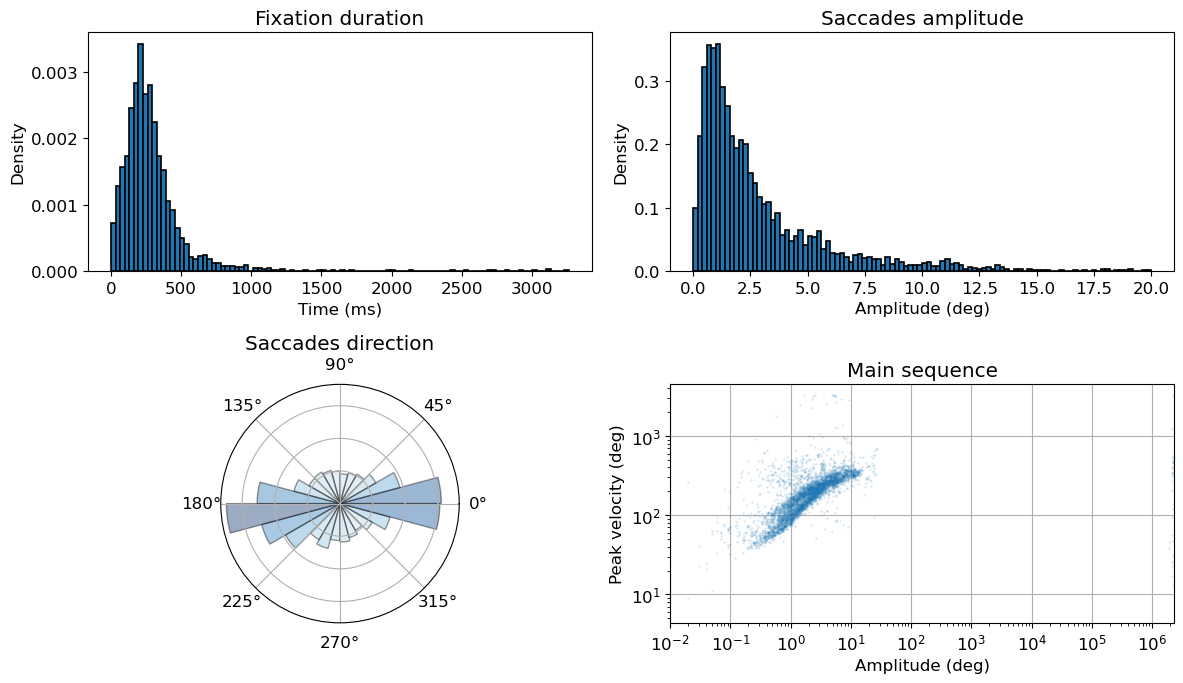

In [19]:
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

fixation_duration(fixations=fixations, ax=axs[0, 0])
saccades_amplitude(saccades=saccades, ax=axs[0, 1])
saccades_dir_hist(saccades=saccades, fig=fig, ax=axs[1, 0])
sac_main_seq(saccades=saccades, ax=axs[1, 1])

fig.tight_layout()